In [2]:
import pandas as pd

# Load the data for label smoothing 0.1
label_smoothing_1_df = pd.read_csv('LabelSmoothingCompare/label_smoothing_1.csv')

label_smoothing_1_df.head()

,Experiment Type,Epoch,Train Accuracy,Train Loss,Valid Accuracy,Valid Loss
0,Self-Supervise Rotation Model,1,43.852,1.321705,51.03,1.178031
1,Self-Supervise Rotation Model,2,53.576,1.148656,57.35,1.096291
2,Self-Supervise Rotation Model,3,56.412,1.099820,57.72,1.097421
3,Self-Supervise Rotation Model,4,59.400,1.060479,60.69,1.035131
4,Self-Supervise Rotation Model,5,60.996,1.030742,60.83,1.029862


In [5]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss for each experience type, excluding 'Self-Supervise Rotation Model'
def plot_stacked_metrics_excluding_rotation(reports, exclude_type='Self-Supervise Rotation Model'):
    """
    Plots the accuracy and loss for each experience type in a stacked manner, excluding the specified type.

    Parameters:
    - reports (list of DataFrame): A list containing the pandas DataFrames of reports.
    - exclude_type (str): The type of experiment to exclude from the plots.
    """
    # Create subplots for accuracy and loss
    fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

    # Iterate over the reports to plot accuracy and loss
    for idx, report in enumerate(reports):
        for exp_type in report['Experiment Type'].unique():
            if exp_type != exclude_type:
                # Select the subset of data for the current experiment type
                df_subset = report[report['Experiment Type'] == exp_type]

                # Plot Accuracy
                axes[0].plot(df_subset['Epoch'], df_subset['Train Accuracy'], label=f'Train Acc (LS 0.{idx}) - {exp_type}')
                axes[0].plot(df_subset['Epoch'], df_subset['Valid Accuracy'], label=f'Valid Acc (LS 0.{idx}) - {exp_type}', linestyle='--')

                # Plot Loss
                axes[1].plot(df_subset['Epoch'], df_subset['Train Loss'], label=f'Train Loss (LS 0.{idx}) - {exp_type}')
                axes[1].plot(df_subset['Epoch'], df_subset['Valid Loss'], label=f'Valid Loss (LS 0.{idx}) - {exp_type}', linestyle='--')

    # Set titles and labels
    axes[0].set_title('Train and Validation Accuracy for Each Experience Type')
    axes[1].set_title('Train and Validation Loss for Each Experience Type')
    axes[1].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[1].set_ylabel('Loss')

    # Set legends
    axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), fancybox=True)
    axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), fancybox=True)

    # Set grid
    axes[0].grid(True)
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0, 0.75, 1])
    plt.show()

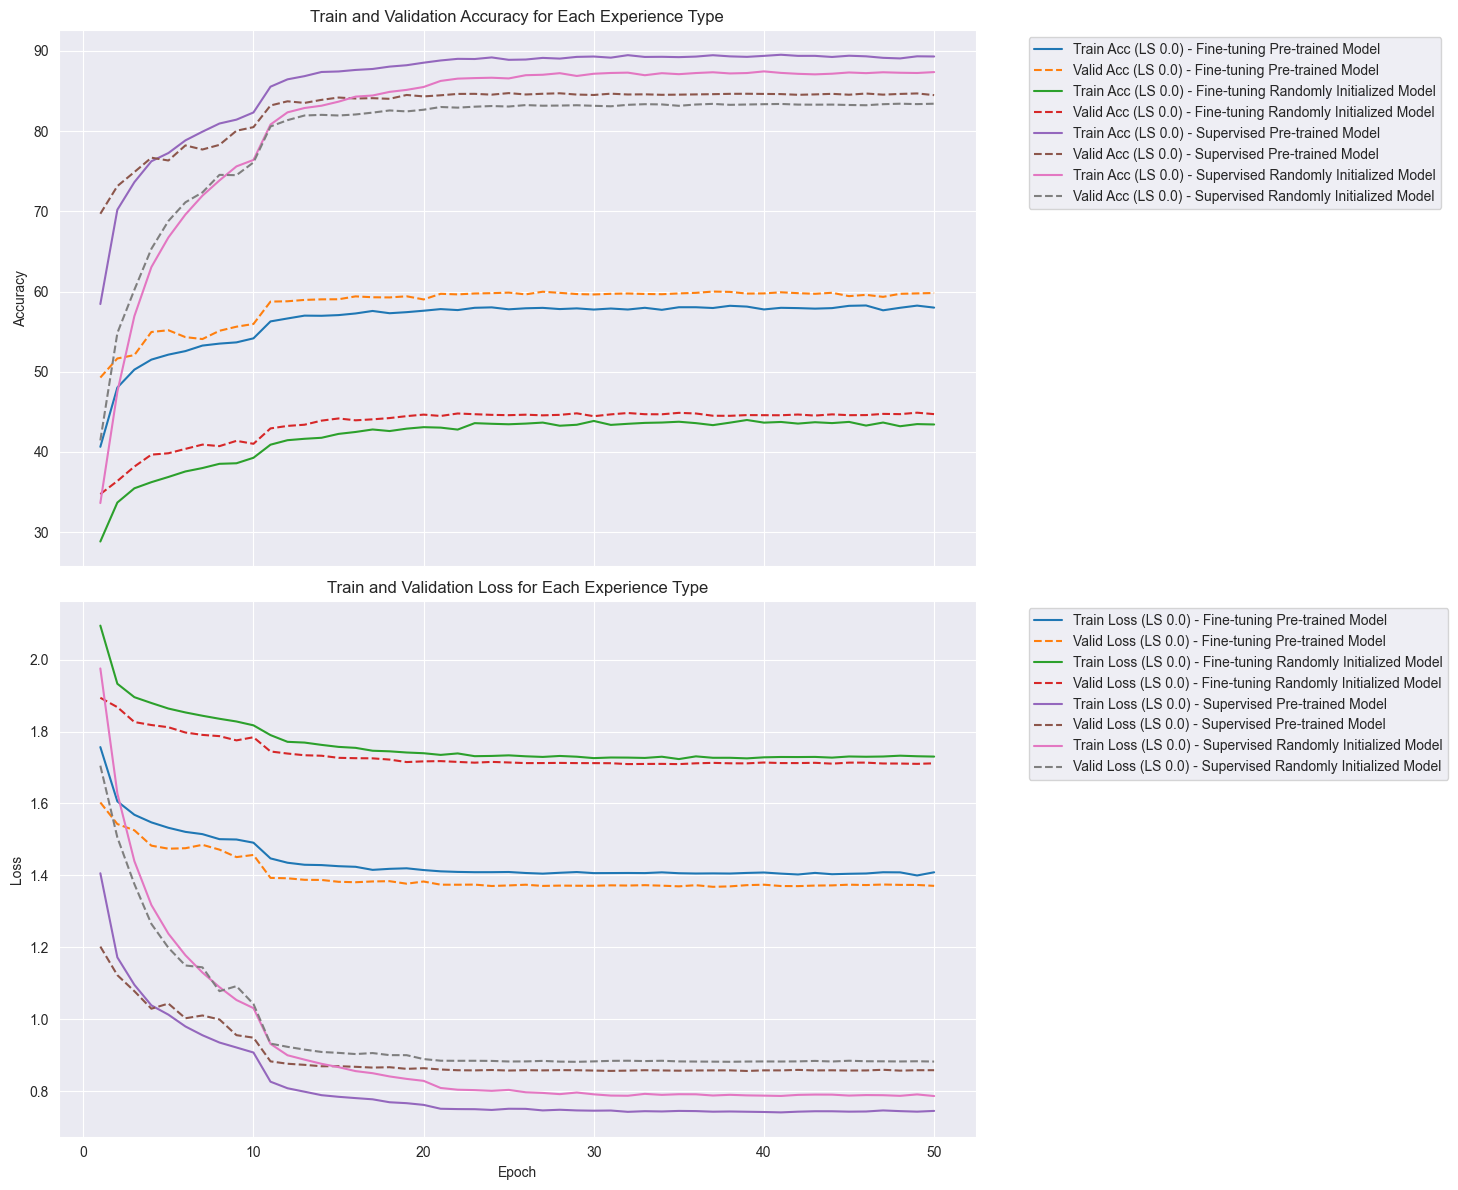

In [6]:
# Generate the plots with the updated legend position
plot_stacked_metrics_excluding_rotation([label_smoothing_1_df])

In [7]:
import matplotlib.pyplot as plt

def plot_experience_metrics(df, title_prefix):
    """
    Plot accuracy and loss for each experiment type within the same experience.

    Parameters:
    - df (DataFrame): The DataFrame containing the report data.
    - title_prefix (str): A prefix to add to the title of the plots.
    """
    experiment_types = df['Experiment Type'].unique()

    for exp_type in experiment_types:
        exp_data = df[df['Experiment Type'] == exp_type]

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'{title_prefix} - {exp_type}')

        # Plot Accuracy
        axes[0].plot(exp_data['Epoch'], exp_data['Train Accuracy'], label='Train Accuracy')
        axes[0].plot(exp_data['Epoch'], exp_data['Valid Accuracy'], label='Validation Accuracy', linestyle='--')
        axes[0].set_title('Accuracy over Epochs')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True)

        # Plot Loss
        axes[1].plot(exp_data['Epoch'], exp_data['Train Loss'], label='Train Loss')
        axes[1].plot(exp_data['Epoch'], exp_data['Valid Loss'], label='Validation Loss', linestyle='--')
        axes[1].set_title('Loss over Epochs')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

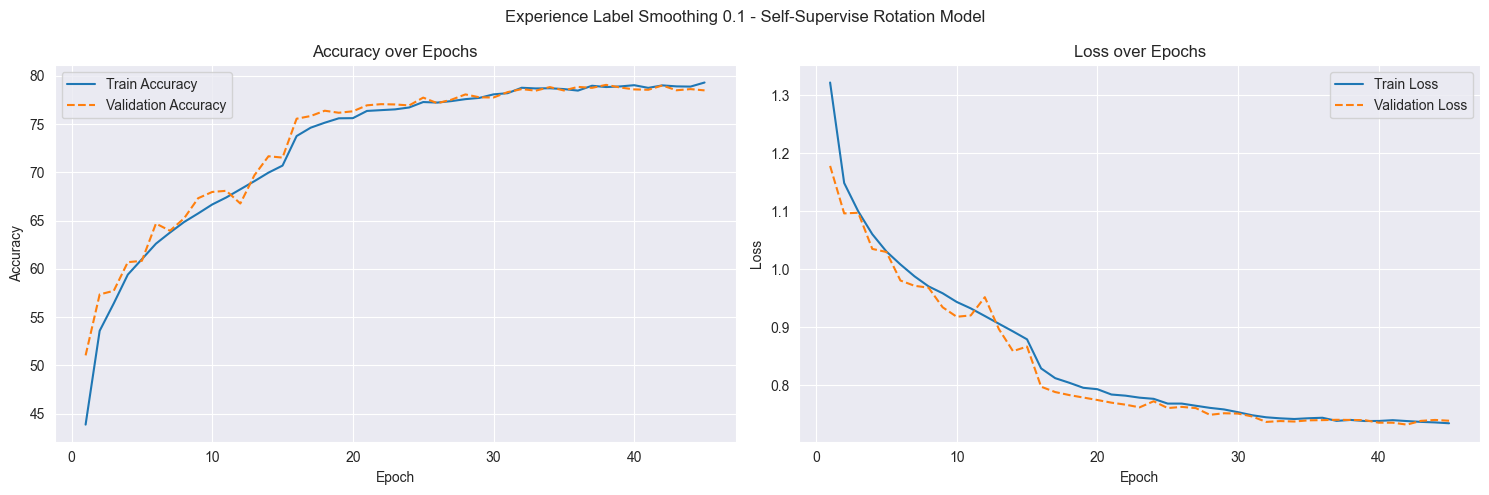

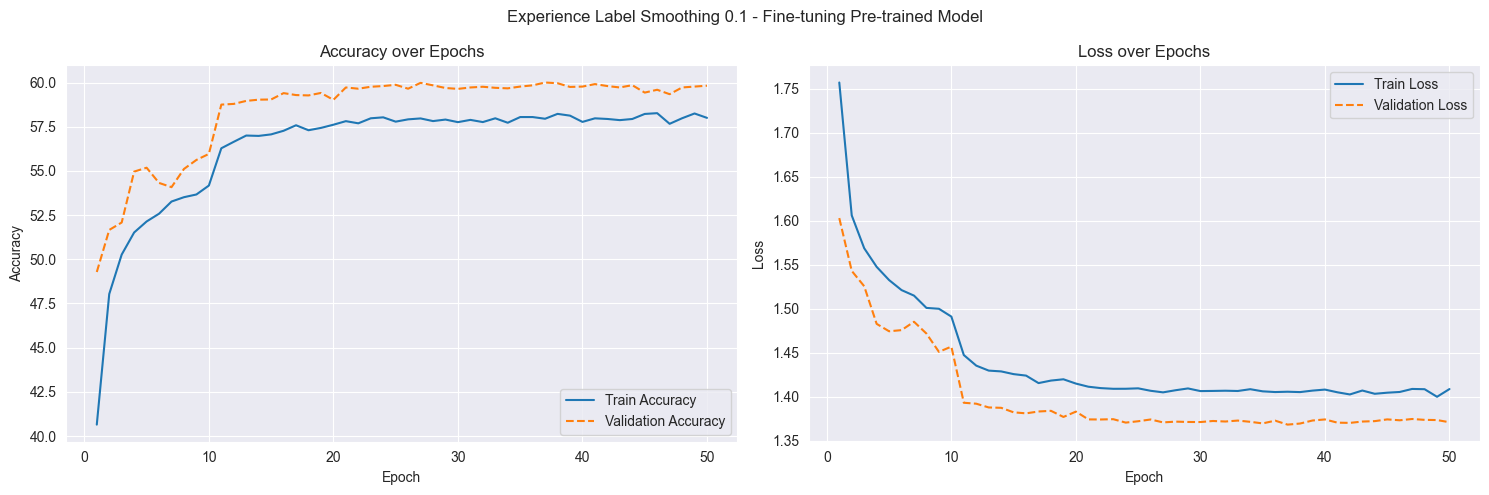

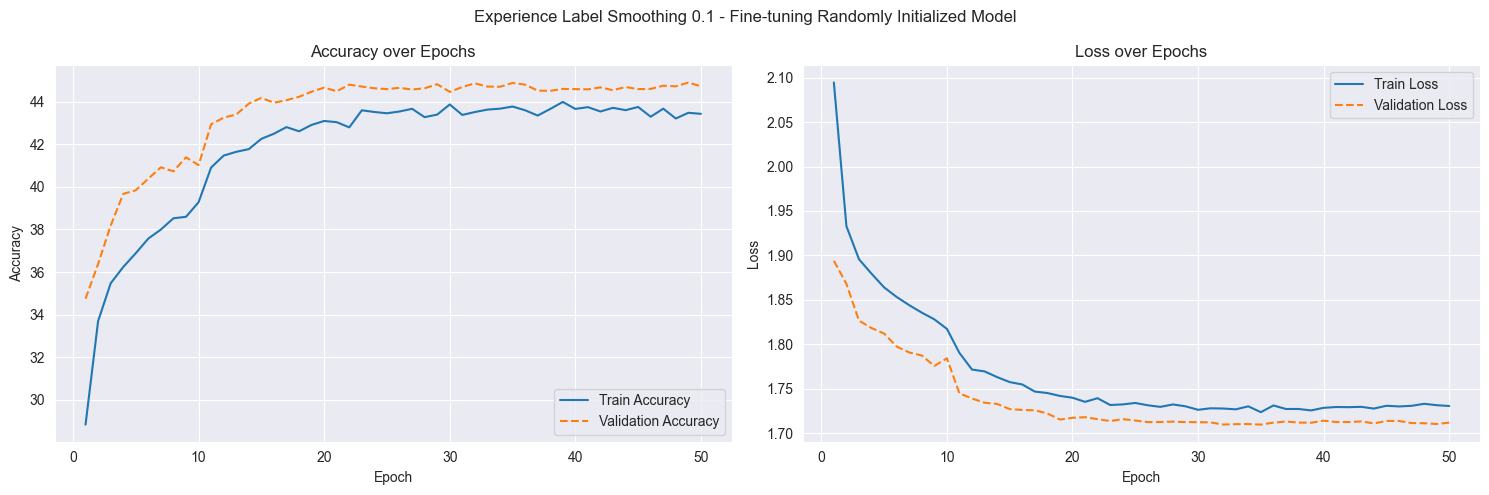

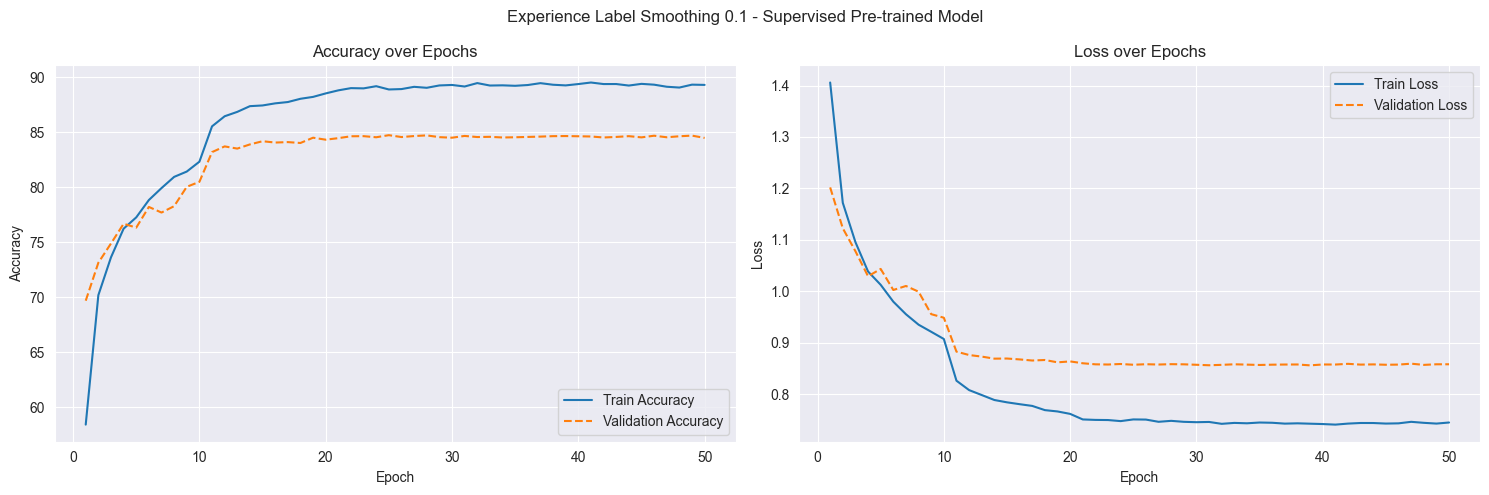

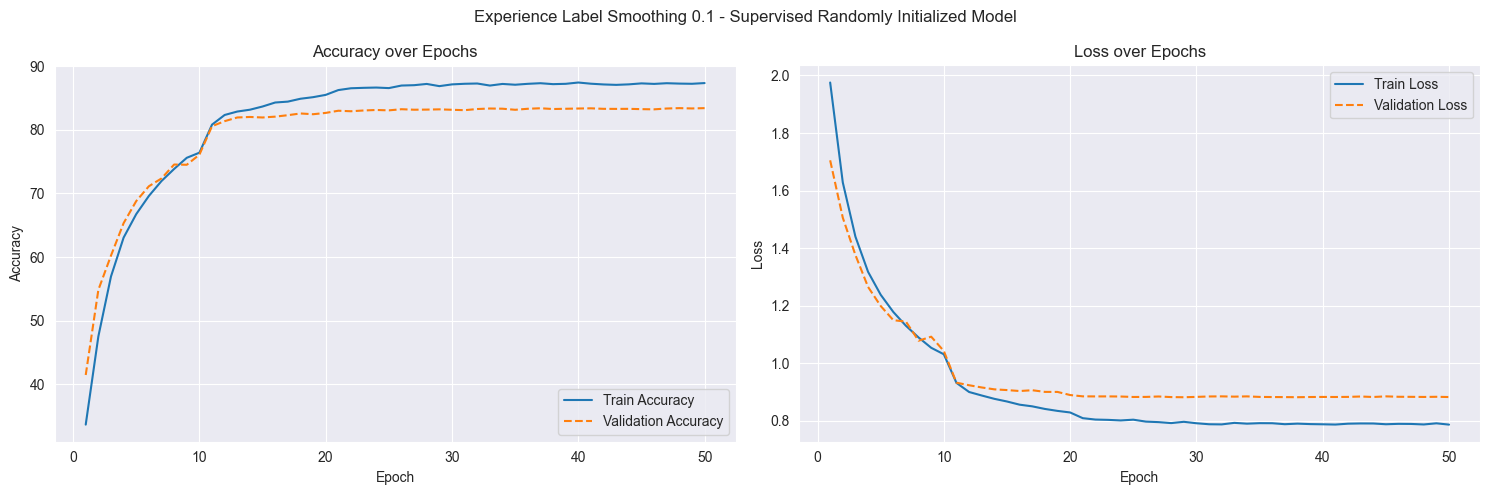

In [8]:
# Call the function with the loaded data and a title prefix
plot_experience_metrics(label_smoothing_1_df, "Experience Label Smoothing 0.1")

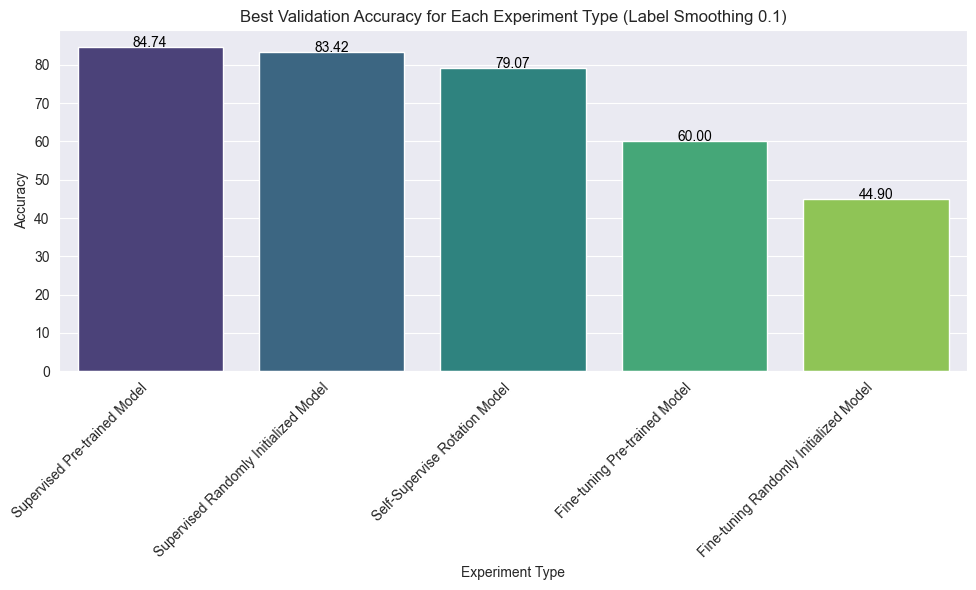

In [13]:
import seaborn as sns

# Get the best accuracy for each experiment type
best_accuracies = label_smoothing_1_df.groupby('Experiment Type')['Valid Accuracy'].max().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=best_accuracies.index, y=best_accuracies.values, palette='viridis')
plt.title('Best Validation Accuracy for Each Experiment Type (Label Smoothing 0.1)')
plt.ylabel('Accuracy')
plt.xlabel('Experiment Type')
plt.xticks(rotation=45, ha='right')

# Add the numbers on top of the bars
for index, value in enumerate(best_accuracies.values):
    plt.text(index, value, f'{value:.2f}', color='black', ha="center")

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Display the plot
plt.show()